# Programming Assignment 1 Notebook: Group 12

- John Mays `johnmays`
- Zaichuan You `ZaichuanYou`
- James McHargue `jpmchargue`

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

## a.)

Create a table of the different metrics for naïve Bayes (m=0.01) and logistic regression (λ =0.01) on the 
different learning problems. Use a different cell for each dataset. For naïve Bayes, set the number of bins 
for continuous features to 10.

#### Voting
|   | Accuracy | Precision | Recall |
| - | - | - | - |
| Naive Bayes | 0.980 | 0.975 | 0.979 |
| Logistic Regression | 0.982 | 0.990 | 0.969 |


#### Volcanoes
|   | Accuracy | Precision | Recall |
| - | - | - | - |
| Naive Bayes | 0.633 | 0.468 | 0.828 |
| Logistic Regression | 0.771 | 0.604 | 0.879 |


#### Spam
|   | Accuracy | Precision | Recall |
| - | - | - | - |
| Naive Bayes | 0.628 | 0.742 | 0.807 |
| Logistic Regression | 0.641 | 0.651 | 0.917 |


\* see Appendix for example calls

## b.)

Examine the effect of λ on logistic regression. Do this by graphing area under ROC across λ=0, 0.001, 
0.01, and 0.1 on the given datasets. 

#### Voting

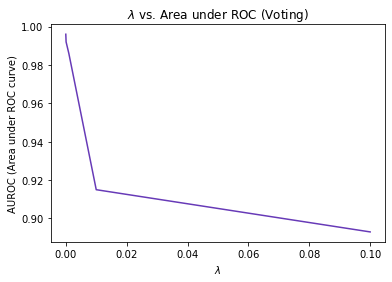

In [2]:
lambdas = [0.0, 0.0001, 0.001, 0.01, 0.1] # log(0) is undefined; first entry is for plotting purposes
aucs = [0.996,0.992,0.986,0.915, 0.893]

plt.plot(lambdas, aucs, color=purples[3])
plt.xlabel("$\lambda$")
# plt.xscale('log') # log(0) is undefined; so I will not plot logarithmically
plt.ylabel("AUROC (Area under ROC curve)")
plt.title("$\lambda$ vs. Area under ROC (Voting)");

#### Volcanoes

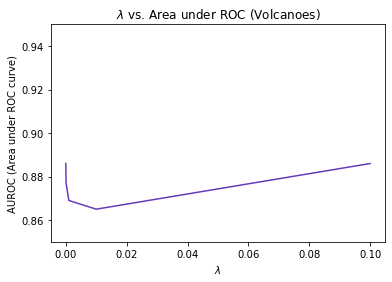

In [3]:
lambdas = [0.0, 0.0001, 0.001, 0.01, 0.1] # log(0) is undefined; first entry is for plotting purposes
aucs = [0.886, 0.877, 0.869, 0.865, 0.886]

plt.plot(lambdas, aucs, color=purples[3])
plt.xlabel("$\lambda$")
# plt.xscale('log') # log(0) is undefined; so I will not plot logarithmically
plt.ylim(0.850,0.950)
plt.ylabel("AUROC (Area under ROC curve)")
plt.title("$\lambda$ vs. Area under ROC (Volcanoes)");

#### Spam

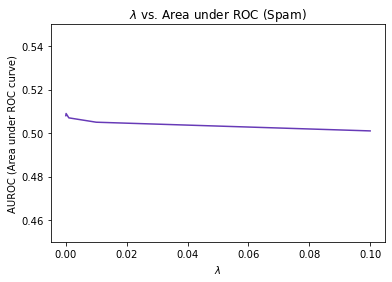

In [4]:
lambdas = [0.0, 0.0001, 0.001, 0.01, 0.1] 
aucs = [0.508, 0.509, 0.507, 0.505, 0.501]

plt.plot(lambdas, aucs, color=purples[3])
plt.xlabel("$\lambda$")
# plt.xscale('log') # log(0) is undefined; so I will not plot logarithmically
plt.ylim(0.450,0.550)
plt.ylabel("AUROC (Area under ROC curve)")
plt.title("$\lambda$ vs. Area under ROC (Spam)");

The effect of $\lambda$ on the ROC curve was strange to say the least.  It seemed highly dataset-dependent.  It had a very pronounced and consistent effect on the AUROC for the voting dataset, but it hardly seemed to matter one way or another for the spam dataset.  Perhaps because performance is so poor on Spam, lambda has little effect 

## c.) Research Extension

At first we accidentally implemented stochastic gradient descent for the weights of our logistic regression, but we noticed that it was performing much better that regulard gradient descent.  At least it was at that moment.  We would like to formally test that idea, and inquire into the question of why exactly it does that.  Our hypothesis before testing is this:

_By using SGD, only a certain subset of the dataset is used to do an update/calculate the gradient direction.  Therefore, the gradient may be more erratic, and may have time to jump around and settle into the lowest minima, much like the theory behind simulated annealing._



##### How do we investigate this?  
Well, we want to see convergence, and we want to see if regular gradient descent converges early, so we want to run a good amount of iterations and observe accuracy (or maybe even loss) over time (epochs) for both the stochastic and the regular gradient descent.  We also want the weights to initialize the same so all things are equal.  We want to see how they get stuck relative to one another, which converges faster, etc.

##### Here are some runs on the voting dataset.
As you can see, normal GD takes much longer to converge, and SGD converges smoothly.  Normal GD can also drop in accuracy, meaning that the weights can actually change in a way that hurts the performance, at least temporarily.  It also frequently does not change at all.  The non-smoothness of the NGD graphs can at the very least tell us that normal GD is extraordinarily inefficent compared to SGD (at least under these testing conditions).  Even after 1200 epochs (last figure), NGD refuses to converge above SGD.

<img src="voting_sgd_plot_2.png" width=500/>

<img src="voting_sgd_plot_3.png" width=500/>

<img src="voting_sgd_plot_4.png" width=500/>

<img src="voting_sgd_plot_5.png" width=500/>

It would have been nice to vary more parameters, such as learning rate to see how it affected the convergence b

Note: use the `--research` flag at the end of a call to call these.

### Appendix:
##### Note: Example Calls:
 - `python3 logreg.py ../440data/volcanoes 0.01 0.001 --no-cv`
 - `python3 nbayes.py ../440data/volcanoes 5 0.01 --no-cv`